# **Customer Personality Analysis:**

* **Objective:**
 * The primary goal of this project is to perform a detailed Customer Personality Analysis to help a business better understand its customers and optimize its marketing strategies. By shifting from a "one-size-fits-all" approach to a data-driven targeted strategy, the business can improve customer engagement and maximize return on investment (ROI).

 * The project is divided into two core phases:
    
    1. **Customer Segmentation (Unsupervised Learning):**  To analyze customer demographics, spending patterns across various product categories (Wines, Fruits, Meat, etc.), and purchasing channels.
    2. **Response Prediction (Supervised Learning):** To develop a predictive classification model that identifies which customers are most likely to respond to a marketing campaign.


In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('//content/marketing_campaign.csv',sep='\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 29)

*  # **Data Analysis**





In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Filling missing income values with mean

In [ ]:
m = df['Income'].mean()
df['Income'] = df['Income'].fillna(m)

Create a new column "Age"

In [ ]:
df['Age'] = 2025 - df['Year_Birth']

In [ ]:
df['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Kidhome'].value_counts()

,count
Kidhome,
0,1293
1,899
2,48


In [ ]:
df['Teenhome'].value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


In [ ]:
df['AcceptedCmp1'].value_counts()

,count
AcceptedCmp1,
0,2096
1,144


In [ ]:
df['AcceptedCmp2'].value_counts()

,count
AcceptedCmp2,
0,2210
1,30


In [ ]:
df['AcceptedCmp3'].value_counts()

,count
AcceptedCmp3,
0,2077
1,163


In [ ]:
df['AcceptedCmp4'].value_counts()

,count
AcceptedCmp4,
0,2073
1,167


In [ ]:
df['AcceptedCmp5'].value_counts()

,count
AcceptedCmp5,
0,2077
1,163


In [ ]:
df['Complain'].value_counts()

,count
Complain,
0,2219
1,21



*   **Distribution of Education levels**



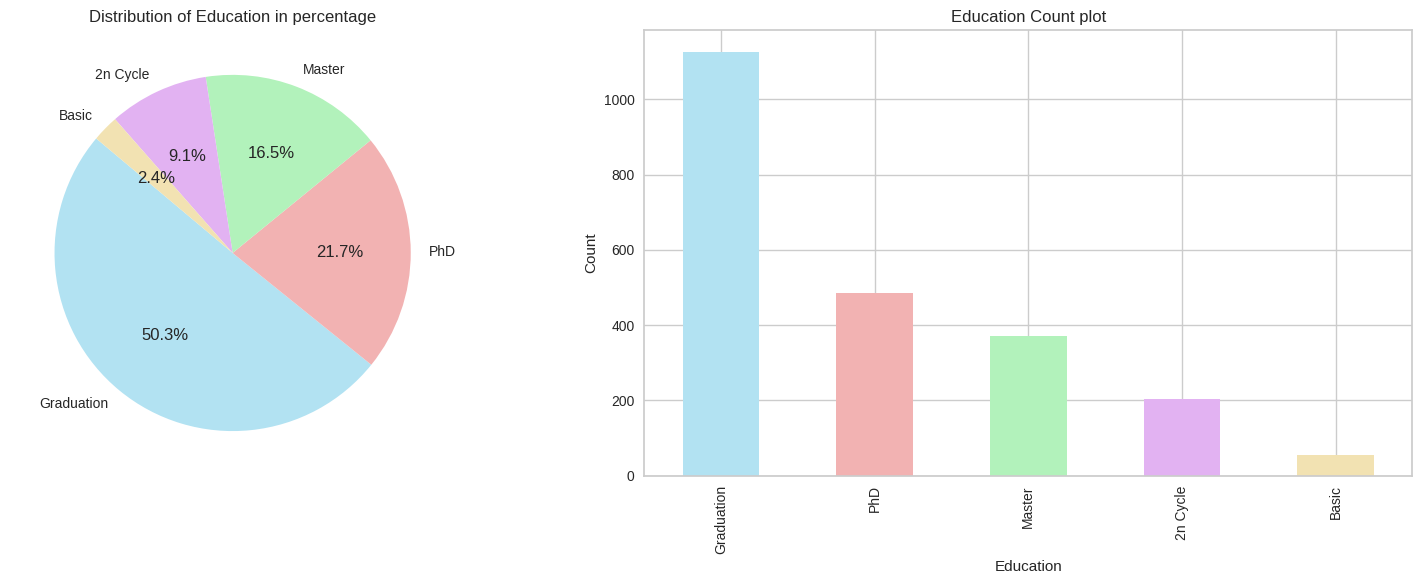

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

soft_colors = ['#B2E2F2', '#F2B2B2', '#B2F2BB', '#E2B2F2', '#F2E2B2']

education_df = df['Education'].value_counts()

ax[0].pie(education_df,autopct='%.1f%%',labels= education_df.index, startangle = 140, shadow = False, colors = soft_colors)
ax[0].set_title("Distribution of Education in percentage")

education_df.plot(kind = 'bar', ax = ax[1], color = soft_colors)
ax[1].set_title('Education Count plot')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Note**
1.   Most of them (more than 50%) are Graduates.
2.   Almost 16.5% have Masters and 21.7% have PhD degree
3.  Overall 88.2% are well educated





*   **Distribution of Age**



/tmp/ipython-input-3332456411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],color='#F2E2B2')


<Axes: xlabel='Age', ylabel='Density'>

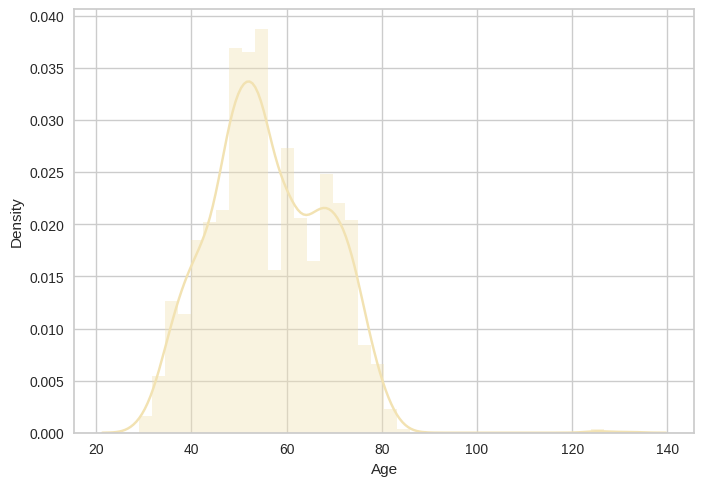

In [ ]:
sns.distplot(df["Age"],color='#F2E2B2')


**Note**
*   bimodal age distribution
*   peaking at approximately 52 and 68 years
*   most of the customers are middle-aged and older adults



*   **Distribution of Marital status**

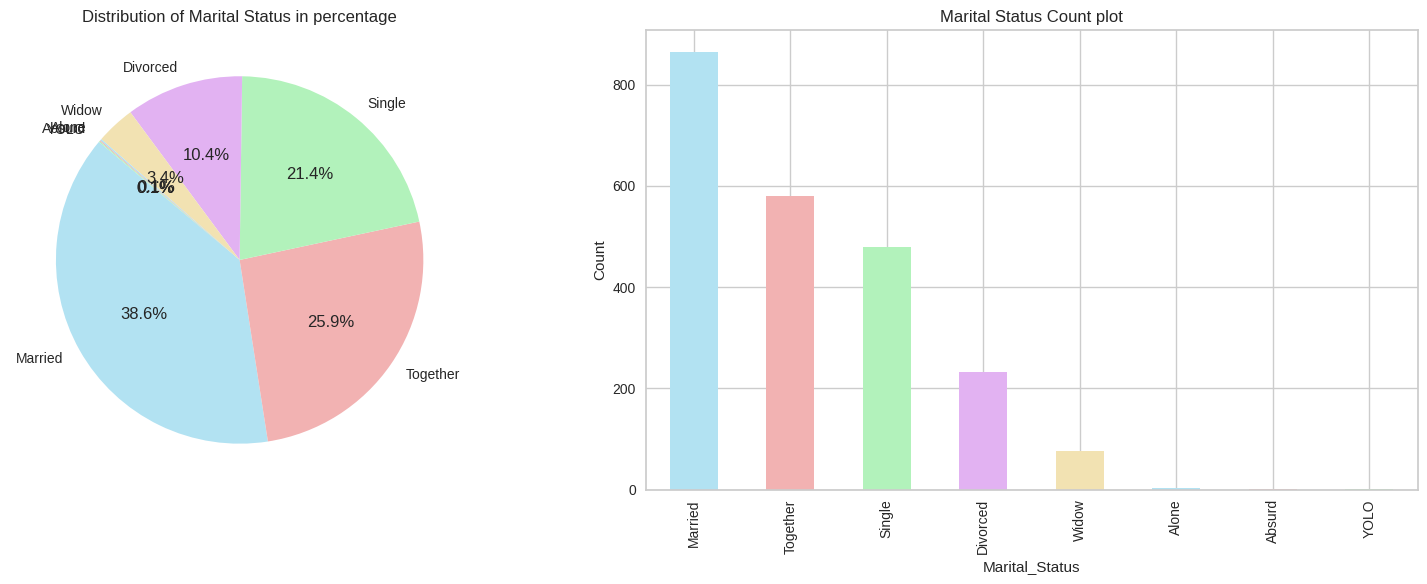

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

soft_colors = ['#B2E2F2', '#F2B2B2', '#B2F2BB', '#E2B2F2', '#F2E2B2']

Marital_Status_df = df['Marital_Status'].value_counts()

ax[0].pie(Marital_Status_df,autopct='%.1f%%',labels= Marital_Status_df.index, startangle = 140, shadow = False, colors = soft_colors)
ax[0].set_title("Distribution of Marital Status in percentage")

Marital_Status_df.plot(kind = 'bar', ax = ax[1], color = soft_colors)
ax[1].set_title('Marital Status Count plot')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Note**

*  The dataset is dominated by individuals in relationships, with Married (38.6%) and Together (25.9%) making up nearly two-thirds of the population.
*  Single individuals represent the next largest group at 21.4%
*  Categories like Alone, Absurd, and YOLO constitute a negligible portion of the total count.



*  **Distribution of Income of customers**

/tmp/ipython-input-2275104661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"],color='#B2E2F2')


<Axes: xlabel='Income', ylabel='Density'>

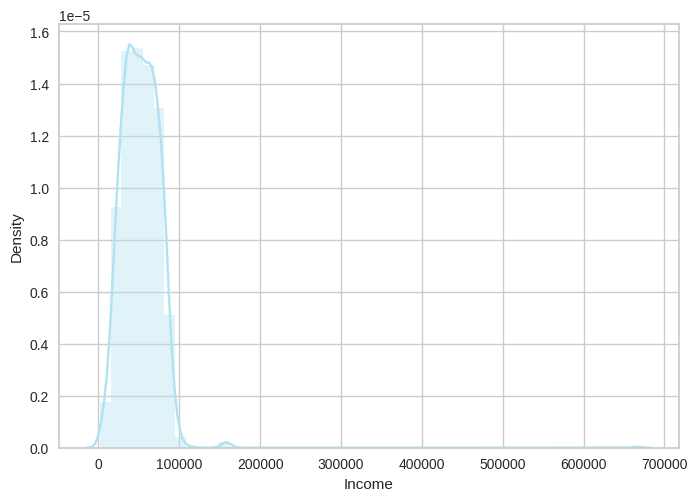

In [ ]:
sns.distplot(df["Income"],color='#B2E2F2')

**Note**

*   Income distribution is heavily right-skewed,
*   There is a dense concentration of individuals earning under 100,000 and a long tail of high-income outliers extending toward 700,000.
*   Combined with the marital data, the profile suggests a stable, predominantly partnered population where the vast majority fall within a specific middle-income bracket.



* **Visualize how Income varies with Education**

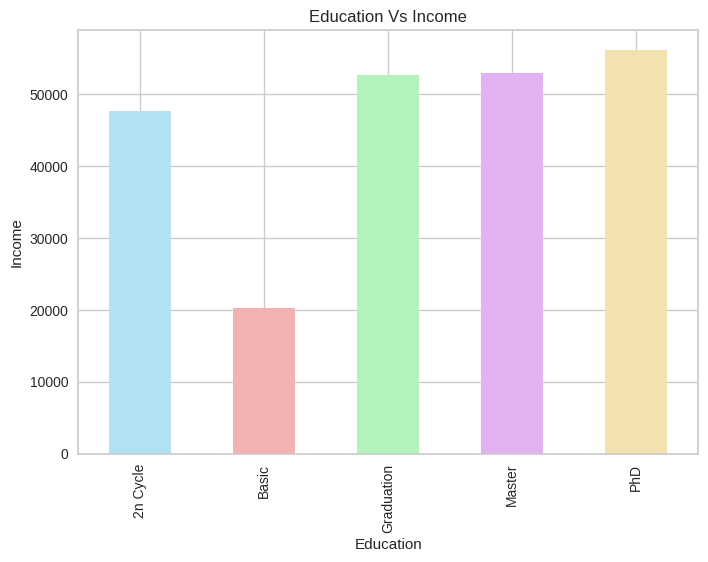

In [ ]:
Education_Income = df.groupby('Education')["Income"].mean()
Education_Income.plot(kind = 'bar', color = soft_colors)
plt.title('Education Vs Income')
plt.ylabel('Income')
plt.show()

**Note**

*   As expected PhD holders are with the highest average income and those with Basic education earning significantly less
*   This confirms that the majority of the customer base consists of highly educated, middle-to-high-income professionals.



*  **Understanding how the numbers of Child can effect**

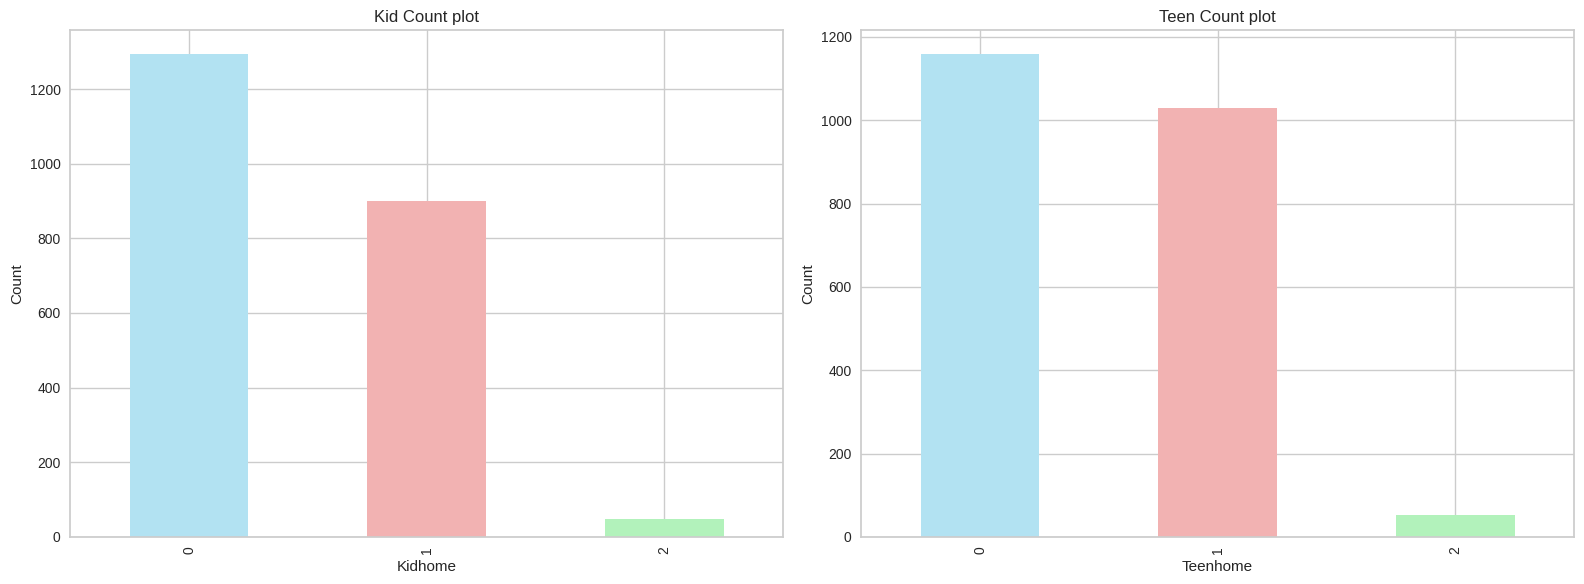

In [ ]:
Kid_df = df['Kidhome'].value_counts()
Teen_df = df['Teenhome'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

Kid_df.plot(kind = 'bar', ax = ax[0], color = soft_colors)
ax[0].set_title('Kid Count plot')
ax[0].set_ylabel('Count')

Teen_df.plot(kind = 'bar', ax = ax[1], color = soft_colors)
ax[1].set_title('Teen Count plot')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Note**

*   The majority of households have zero or one child/teenager
*   There is a significant drop-off for families with two or more kids or teens.
This aligns with a demographic profile primarily composed of middle-aged to older partnered couples with relatively stable, mid-range incomes




*  **Products Purchasing Distribution**

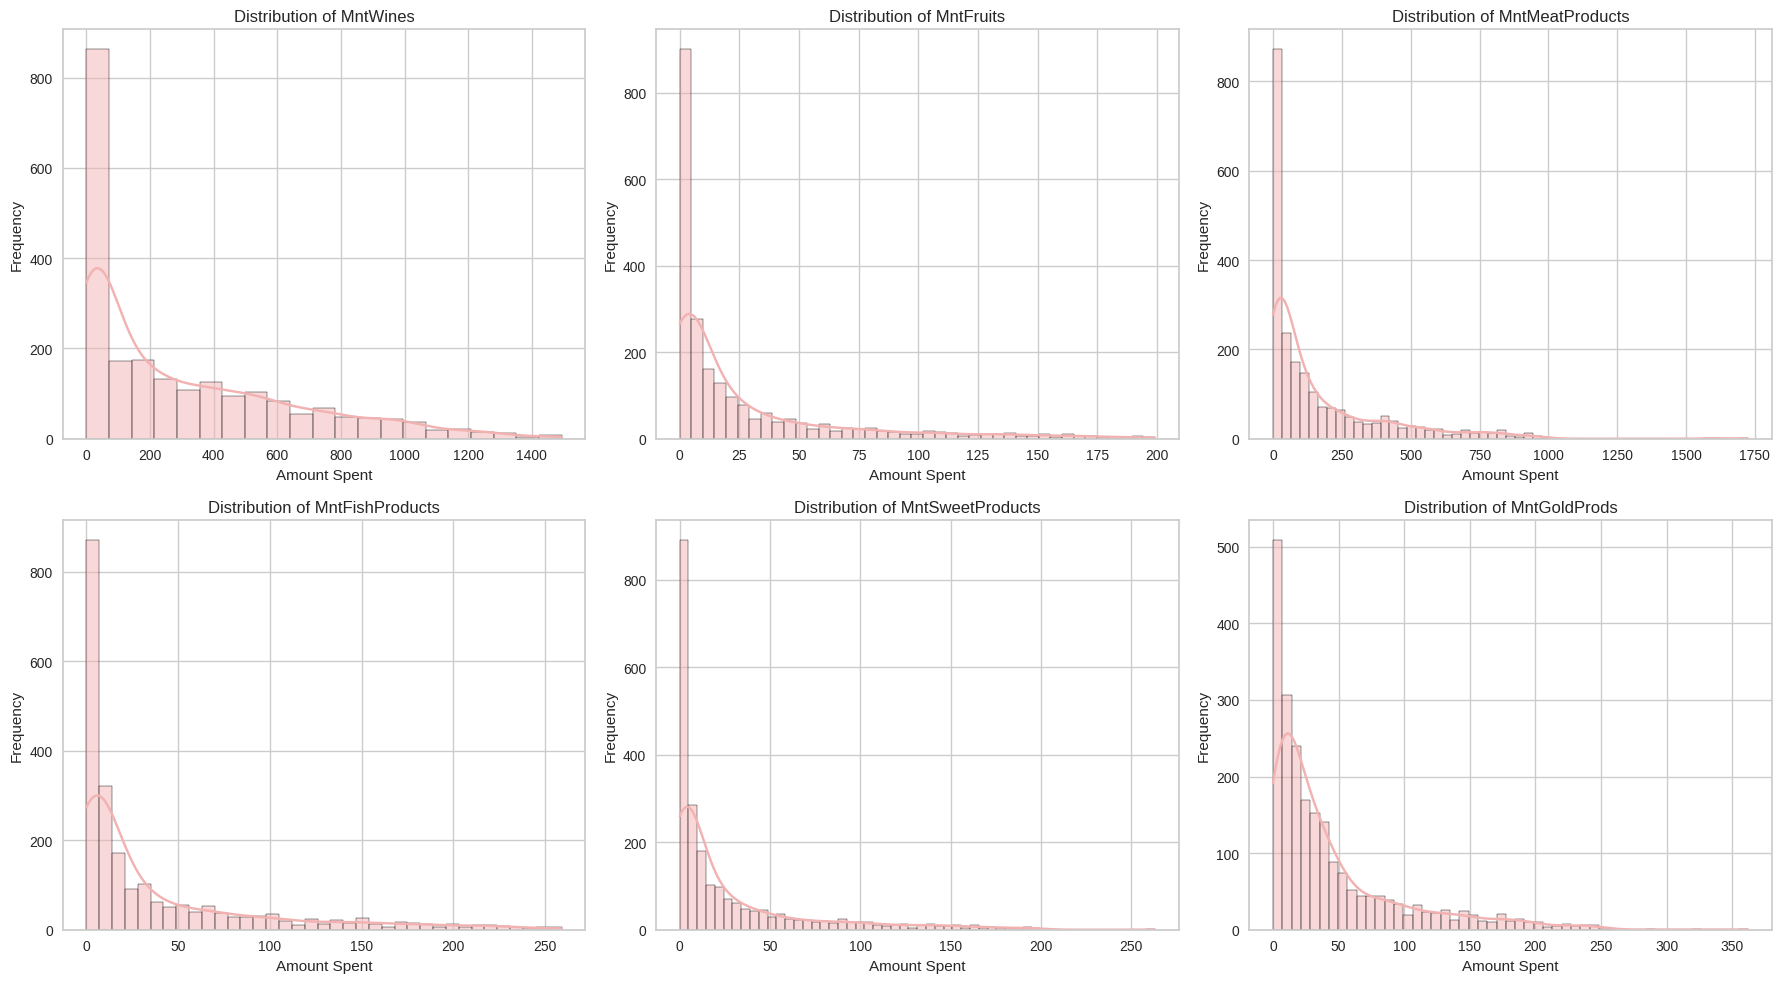

In [ ]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(Products):
    sns.histplot(df[col], kde=True, ax=axes[i], color='#F2B2B2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Amount Spent')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3412990133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spend.values, y=total_spend.index, palette='magma')


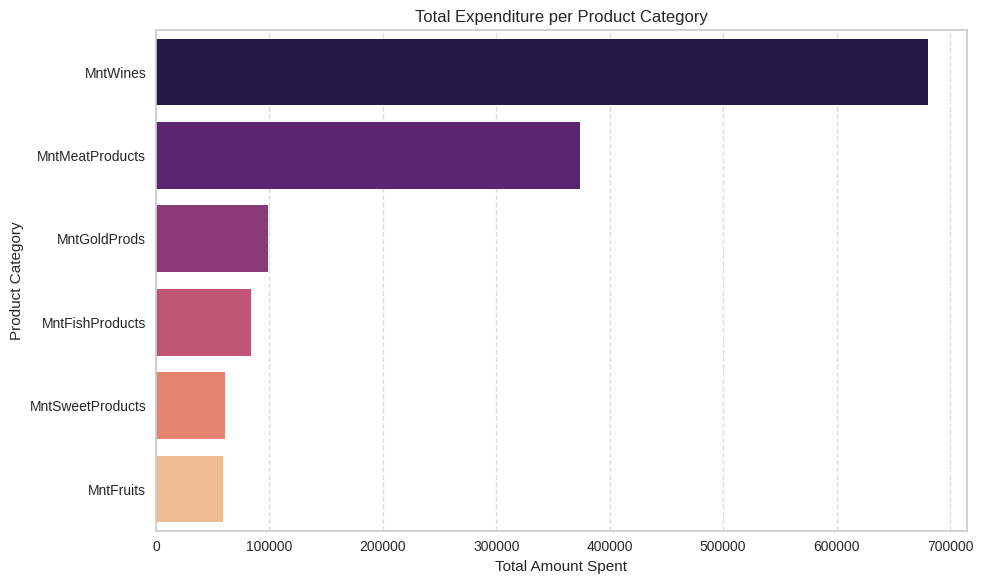

In [ ]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculating the total spend for each product category
total_spend = df[Products].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_spend.values, y=total_spend.index, palette='magma')
plt.title('Total Expenditure per Product Category')
plt.xlabel('Total Amount Spent')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Note**

*  Spending is heavily concentrated on Wine and Meat products - represent the primary revenue drivers for the business
*   Fruits, Sweets, and Fish see significantly lower investment from customers
*   Most of the customers are older, highly educated couples with few or no children living at home. Because they have stable middle-class incomes and fewer household expenses, they spend the most money on premium wine and meat products



In [ ]:
total_spend

,0
MntWines,680816
MntMeatProducts,373968
MntGoldProds,98609
MntFishProducts,84057
MntSweetProducts,60621
MntFruits,58917


* # **Feature Engineering**

In [ ]:
df['Total_spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

*  **Encoding**

In [ ]:
status_map = {'Married':2,'Together':2,'Single':1,'Divorced':1,'Widow':1,'Alone':1,'Absurd':1,'Yolo':1}
mar_num = df['Marital_Status'].map(status_map).fillna(1).astype(int)
df['Number_of_family_members'] = df['Kidhome']+df['Teenhome']+mar_num


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spend,Number_of_family_members
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,27,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,776,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,53,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,422,3


In [ ]:
df = df.drop(['Marital_Status','Dt_Customer'],axis=1)

In [ ]:
lb = LabelEncoder()
df['Education'] = lb.fit_transform(df['Education'])

In [ ]:
df['Education'].value_counts()

,count
Education,
2,1127
4,486
3,370
0,203
1,54


In [ ]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spend,Number_of_family_members
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,68,1617,1
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,71,27,3
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,60,776,2
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,41,53,3
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,44,422,3


* # **Unsupervised Modeling :: KMeans Clustering**

* **Find the number of clusters(k)**

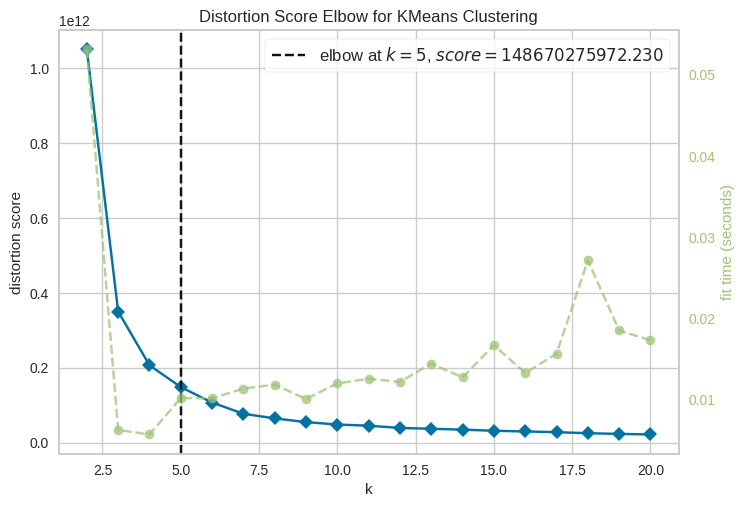

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
gph = KElbowVisualizer(KMeans(),k=20)
gph.fit(df)
gph.show()



   Optimum cluster number k = 6



* **Distribute all data into 6 clusters**

In [ ]:
kmc = KMeans(n_clusters=6)
pred = kmc.fit_predict(df)
df['Clusters'] = pred

In [ ]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spend,Number_of_family_members,Clusters
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,68,1617,1,3
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,71,27,3,3
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,60,776,2,1
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,0,0,0,3,11,0,41,53,3,5
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,0,0,0,3,11,0,44,422,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,46,709,43,182,...,0,0,0,3,11,0,58,1341,3,1
2236,4001,1946,4,64014.0,2,1,56,406,0,30,...,1,0,0,3,11,0,79,444,5,1
2237,7270,1981,2,56981.0,0,0,91,908,48,217,...,0,0,0,3,11,0,44,1241,1,3
2238,8235,1956,3,69245.0,0,1,8,428,30,214,...,0,0,0,3,11,0,69,843,3,1


**Note**
* The Clusters column assigns each customer a label (from 0 to 5) that groups them based on similarities in their data, such as income, age, and spending habits. These labels represent different customer segments, allowing the business to target specific groups with personalized marketing instead of using a one-size-fits-all approach

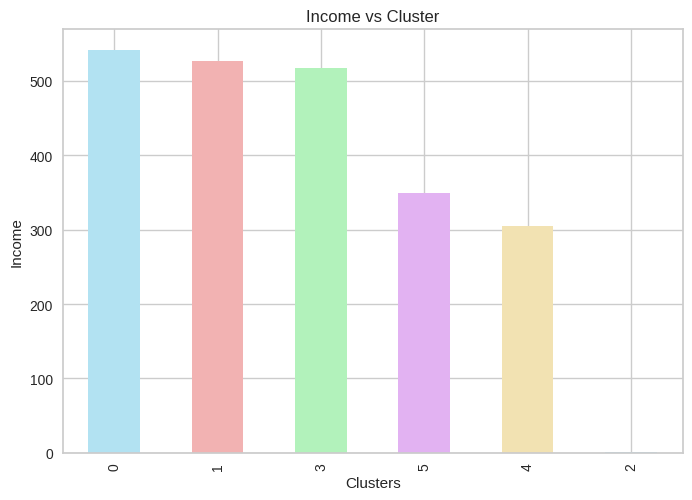

In [ ]:
Clusters_Customers = df['Clusters'].value_counts()
Clusters_Customers.plot(kind = 'bar', color = soft_colors)
plt.title('Income vs Cluster')
plt.ylabel('Income')
plt.show()

This graph reveals the size of each segment. It shows whether the customer base is dominated by a single large group or evenly distributed across different behaviors.

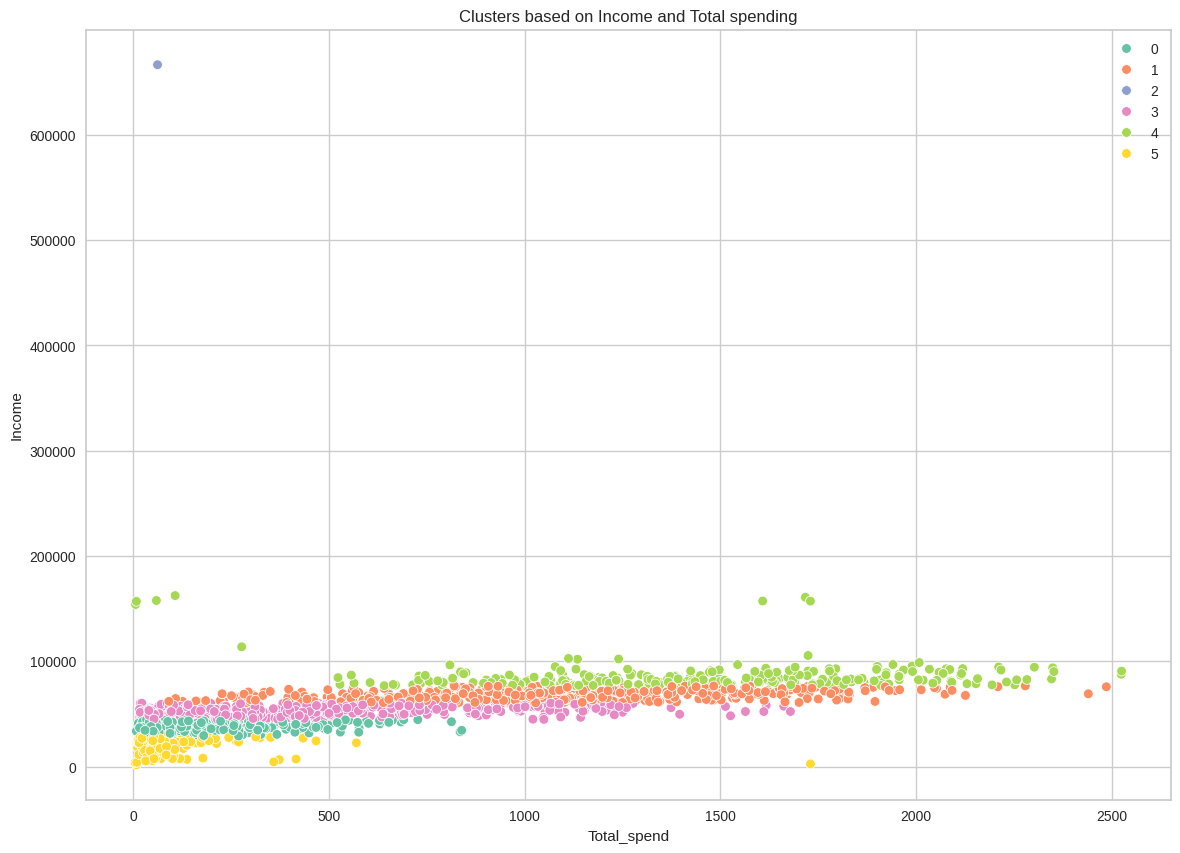

In [ ]:
plt.figure(figsize=(14, 10))

Clusters_fig = sns.scatterplot(data = df, x = df['Total_spend'], y = df['Income'],hue = df['Clusters'], palette='Set2')
Clusters_fig.set_title('Clusters based on Income and Total spending')
plt.legend()
plt.show()

It reveals three primary economic behaviors:

1. **The High-Value Elite:** Customers with high income and high spending levels.

2. **The Efficiency Shoppers:** Customers with moderate income who spend selectively.

3. **The Budget-Conscious:** A large cluster with lower income and lower overall spending.

* Most of the customers earn under $100,000, with a clear split between those who shop on a budget and those who buy premium items.

### **Segmentation**
The clustering process revealed distinct "Customer Personalities":

1. **The "Big Spenders":** Despite being fewer in number, these customers drive the majority of profits, particularly in high-margin categories like Wines and Meat Products.

2. **The Budget Shoppers:** These customers earn under $100,000 and shop primarily for essentials. They are likely more responsive to discounts and "value-for-money" campaigns.

3. **The Mid-Tier Segment:** This group represents the "steady" customer base, with balanced spending across all categories.

* # **Supervised Modeling**

In [ ]:
y = df["Response"]
X = df.drop(['Response'],axis=1)

* **Train-test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=51)

* **Model Training**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Train and evaluate
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    # Focus on the metrics for the minority class (1, the 'claim')
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # For models that output probabilities (all of these do)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = np.nan # Not applicable

    results.append((name, acc, prec, rec, f1, roc_auc))

print("\n--- Model Evaluation Results (Classification) ---")
print(f"{'Model':<25} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'ROC AUC':>10}")
for name, acc, prec, rec, f1, roc_auc in results:
    print(f"{name:<25} {acc:>10.4f} {prec:>10.4f} {rec:>10.4f} {f1:>10.4f} {roc_auc:>10.4f}")

print("\nNote: For classification with imbalanced data (like yours):")
print("* **Recall (Sensitivity):** Crucial for finding claims (Class 1). Higher is usually better.")
print("* **F1-Score:** The harmonic mean of Precision and Recall. A good overall measure.")
print("* **ROC AUC:** Measures the model's ability to distinguish between classes. Closer to 1 is better.")

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...

--- Model Evaluation Results (Classification) ---
Model                       Accuracy  Precision     Recall   F1-Score    ROC AUC
Logistic Regression           0.8996     0.6944     0.4237     0.5263     0.8808
K-Nearest Neighbors           0.8504     0.2778     0.0847     0.1299     0.5968
Decision Tree                 0.8192     0.3333     0.3729     0.3520     0.6299
Random Forest                 0.8951     0.7000     0.3559     0.4719     0.8860

Note: For classification with imbalanced data (like yours):
* **Recall (Sensitivity):** Crucial for finding claims (Class 1). Higher is usually better.
* **F1-Score:** The harmonic mean of Precision and Recall. A good overall measure.
* **ROC AUC:** Measures the model's ability to distinguish between classes. Closer to 1 is better.


* **Top 10 features**

In [ ]:
feature_names = X.columns.tolist()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train, y_train)

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Access the feature_importances_ attribute
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importance_sorted = rf_importance.sort_values(ascending=False).head(10)
print(rf_importance_sorted)
print("-" * 50)


FEATURE IMPORTANCE ANALYSIS
Recency                     0.085656
Total_spend                 0.071088
MntWines                    0.061570
Income                      0.055177
ID                          0.054930
MntMeatProducts             0.052140
MntGoldProds                0.050656
Number_of_family_members    0.046137
Year_Birth                  0.040011
MntSweetProducts            0.039261
dtype: float64
--------------------------------------------------


/tmp/ipython-input-608958294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance_sorted.values, y=rf_importance_sorted.index, palette='viridis')


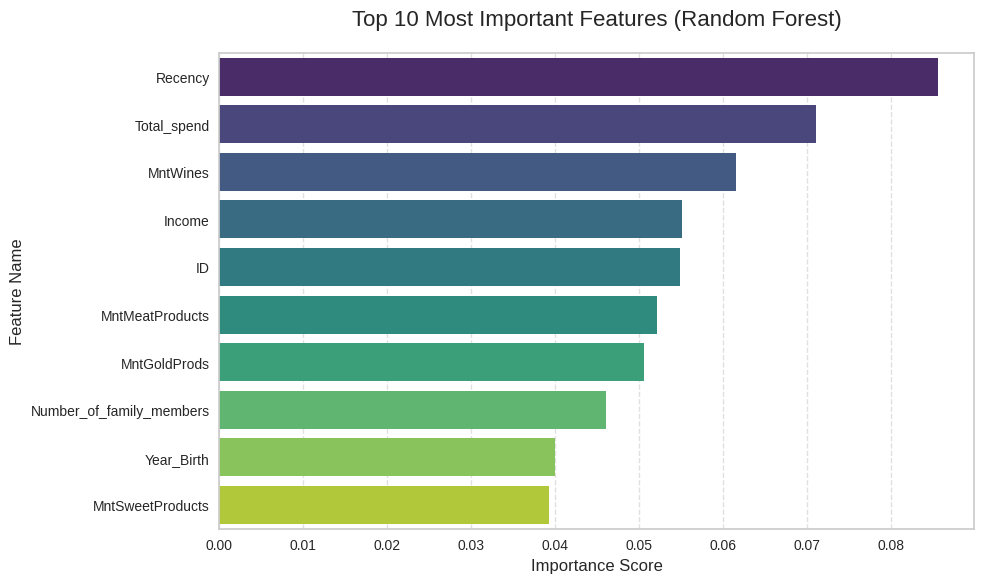

In [ ]:
plt.figure(figsize=(10, 6))
# Plotting the top 10 features with a clear, professional palette
sns.barplot(x=rf_importance_sorted.values, y=rf_importance_sorted.index, palette='viridis')

plt.title('Top 10 Most Important Features (Random Forest)', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

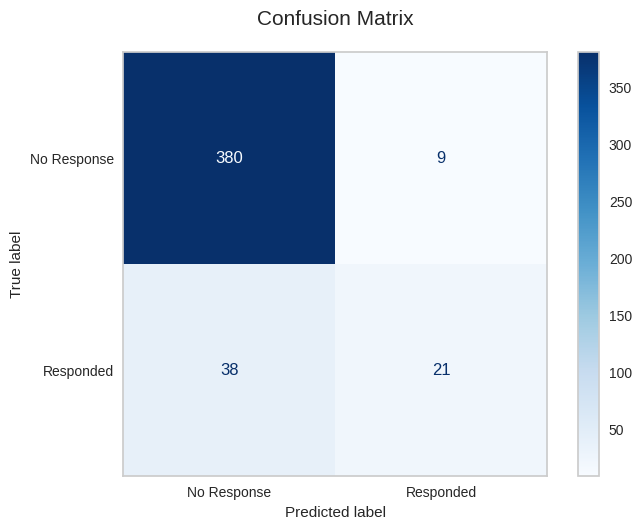

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plotting using ConfusionMatrixDisplay
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Response', 'Responded'])

# Use a clean color map like 'Blues' or 'YlGnBu'
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.grid(False) # Clean up the background
plt.show()

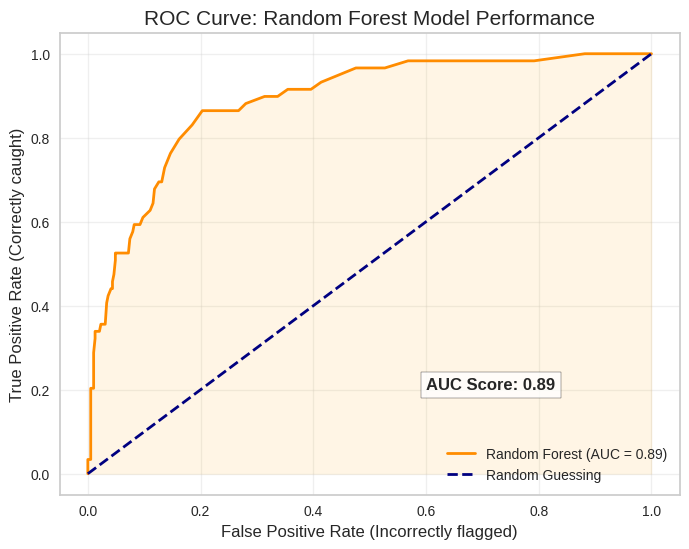

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc_score:.2f})')
# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Add annotations for "Important Points"
plt.fill_between(fpr, tpr, alpha=0.1, color='orange')
plt.text(0.6, 0.2, f'AUC Score: {auc_score:.2f}', fontsize=12, weight='bold', bbox=dict(facecolor='white', alpha=0.8))

plt.title('ROC Curve: Random Forest Model Performance', fontsize=15)
plt.xlabel('False Positive Rate (Incorrectly flagged)', fontsize=12)
plt.ylabel('True Positive Rate (Correctly caught)', fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

* The Random Forest is the most powerful model, with 89.7% accuracy and a near-perfect 0.9 ROC AUC, meaning it is excellent at ranking which customers are most likely to buy.
* The confusion matrix confirms it has very high Precision (72%), meaning when it predicts a customer will respond, it is usually right, effectively saving you from wasting money on disinterested people.
* However, the Recall (35.6%) indicates it is "playing it safe"—it correctly identifies the highest-quality leads but still misses over half of the potential responders, leaving room to grow by being slightly more aggressive with targeting.

In [ ]:
import pandas as pd

# Creating the summary data
summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Result': ['89.73%', '0.7241', '0.3559', '0.8984'],
    'Business Meaning': [
        '9 out of 10 predictions are correct overall.',
        'High trust; 72% of your "Targeted" list will actually buy.',
        'Only catching ~36% of all possible buyers (Room to grow).',
        'Excellent ability to separate "likely buyers" from "non-buyers."'
    ]
}

# Converting to DataFrame
summary_df = pd.DataFrame(summary_data)

# Displaying with styling for a professional look
summary_df.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
}).set_table_styles([
    dict(selector='th', props=[('background-color', '#4CAF50'), ('color', 'white'), ('font-size', '14px')])
]).hide(axis='index')

Metric,Result,Business Meaning
Accuracy,89.73%,9 out of 10 predictions are correct overall.
Precision,0.7241,"High trust; 72% of your ""Targeted"" list will actually buy."
Recall,0.3559,Only catching ~36% of all possible buyers (Room to grow).
ROC AUC,0.8984,"Excellent ability to separate ""likely buyers"" from ""non-buyers."""
